In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load datasets 
red_wine = pd.read_csv("F:\DataSciCAB\DataSci\wine\WineDataset\winequality-red.csv", sep=";")
white_wine = pd.read_csv("F:\DataSciCAB\DataSci\wine\WineDataset\winequality-white.csv", sep=";")

In [4]:
#rename columns in red wine ds
for col in red_wine.columns:
    red_wine.rename(columns={col:col.lower().replace(" ","_")},inplace=True)
red_wine.head(0)
#rename columns in white wine ds
for col in white_wine.columns:
    white_wine.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

In [5]:
#so i have decided to remove all the wine samples with higher level of total sulfur dioxide 
white_wine.drop(white_wine[white_wine['total_sulfur_dioxide']>= 210].index, inplace= True)


In [6]:
#so i have decided to remove all the wine samples with higher level of total sulfur dioxide 
red_wine.drop(red_wine[red_wine['total_sulfur_dioxide']>=160].index, inplace=True)


In [7]:
red_wine["type"] = "red"
white_wine["type"] = "white"

# concatenate the DataFrames along the rows
wines = pd.concat([red_wine, white_wine], axis=0)

# reset the index of the concatenated DataFrame
wines = wines.reset_index(drop=True)

Feature Selection using correlations 

<AxesSubplot:>

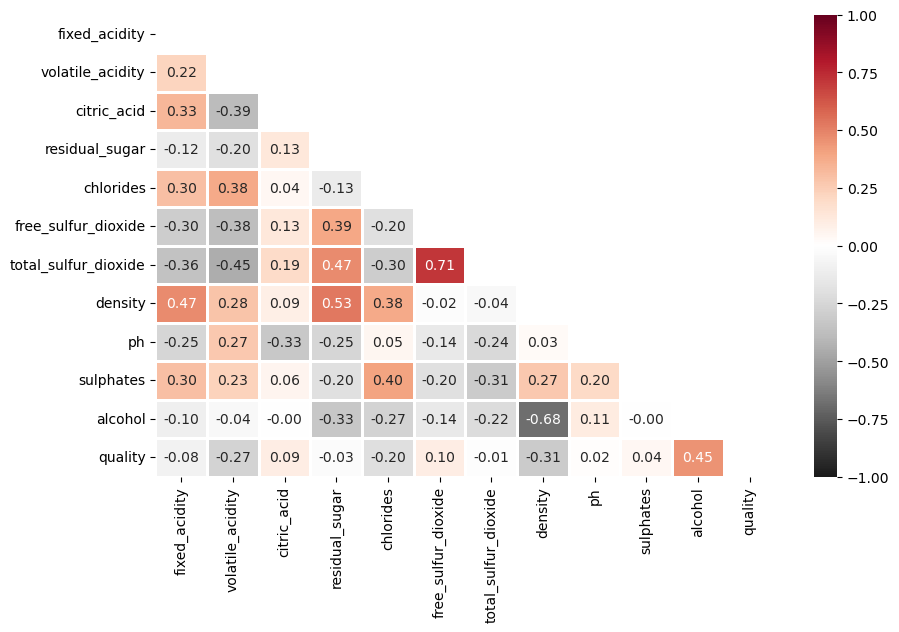

In [8]:

# calculate the correlation matrix
import warnings
warnings.filterwarnings('ignore')

# Create the correlation matrix on white wine 
plt.figure(figsize=(10,6))
corr_matrix = wines.corr()

# Create a mask to hide the upper triangle of the matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with the mask applied
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=2, mask=mask, cmap='RdGy_r', vmax= 1, vmin=-1)



In [8]:
for a in range(len(wines.corr().columns)):
    for b in range(a):
        if abs(wines.corr().iloc[a,b]) >0.6:
            name = wines.corr().columns[a]
            print(name)

total_sulfur_dioxide
alcohol


In [9]:
#since total sulfur dioxide and alcohol have high correlation, but alcohol is important feature so we can remove density which is having high 
#correlation with alcohol.
wines = wines.drop('total_sulfur_dioxide',axis=1)
wines = wines.drop('density',axis=1)

Encodeding categorical values

In [10]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# apply One-Hot Encoding on wine_type column
onehot_encoder = OneHotEncoder(sparse=False)
wine_type_encoded = onehot_encoder.fit_transform(wines[['type']])
df_wine_type_encoded = pd.DataFrame(wine_type_encoded, columns=onehot_encoder.get_feature_names(['type']))
wines = pd.concat([wines, df_wine_type_encoded], axis=1)

# apply Label Encoding on quality column
label_encoder = LabelEncoder()
wines['quality_encoded'] = label_encoder.fit_transform(wines['quality'])

# display the encoded dataframe
wines.tail(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,ph,sulphates,alcohol,quality,type,type_red,type_white,quality_encoded
6198,6.8,0.220,0.36,1.20,0.052,38.0,3.04,0.54,9.2,5,white,0.0,1.0,2
6199,4.9,0.235,0.27,11.75,0.030,34.0,3.07,0.50,9.4,6,white,0.0,1.0,3
6200,6.1,0.340,0.29,2.20,0.036,25.0,3.06,0.44,11.8,6,white,0.0,1.0,3
6201,5.7,0.210,0.32,0.90,0.038,38.0,3.24,0.46,10.6,6,white,0.0,1.0,3
6202,6.5,0.230,0.38,1.30,0.032,29.0,3.29,0.54,9.7,5,white,0.0,1.0,2
6203,6.2,0.210,0.29,1.60,0.039,24.0,3.27,0.50,11.2,6,white,0.0,1.0,3
6204,6.6,0.320,0.36,8.00,0.047,57.0,3.15,0.46,9.6,5,white,0.0,1.0,2
6205,6.5,0.240,0.19,1.20,0.041,30.0,2.99,0.46,9.4,6,white,0.0,1.0,3
6206,5.5,0.290,0.30,1.10,0.022,20.0,3.34,0.38,12.8,7,white,0.0,1.0,4
6207,6.0,0.210,0.38,0.80,0.020,22.0,3.26,0.32,11.8,6,white,0.0,1.0,3


In [11]:
wines = wines.drop('type', axis=1)
wines.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,ph,sulphates,alcohol,quality,type_red,type_white,quality_encoded
0,7.4,0.7,0.0,1.9,0.076,11.0,3.51,0.56,9.4,5,1.0,0.0,2


Split dataset for train and test

In [12]:
from sklearn.model_selection import train_test_split


X = wines # --> the features we will keep to build our model
y = wines['type_red'] # --> what you're trying to predict

# Example:
X.drop(['type_red'],axis=1,inplace=True)
X.drop(['type_white'],axis=1,inplace=True)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6203    0.0
6204    0.0
6205    0.0
6206    0.0
6207    0.0
Name: type_red, Length: 6208, dtype: float64


To normalize data

In [13]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

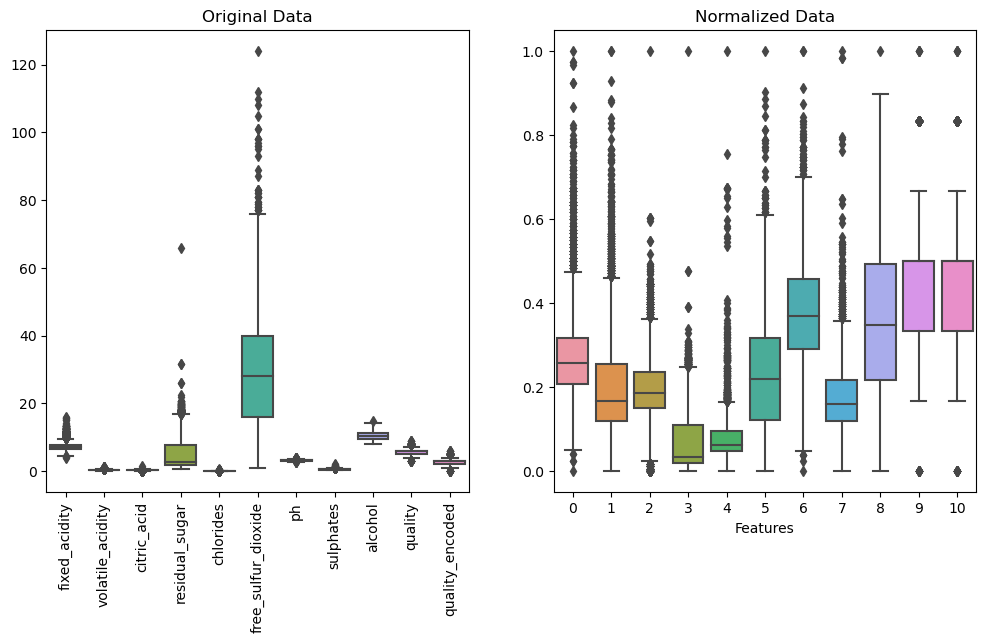

In [14]:
#to see difference before and after normalization using histograms and box plots.


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Create box plots of the original data
sns.boxplot(data=X_train, ax=ax1)
ax1.set_title('Original Data')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create box plots of the normalized data
sns.boxplot(data=X_train_norm, ax=ax2)
ax2.set_title('Normalized Data')
ax2.set_xlabel('Features')

plt.show()

1. Logistic Regresion Model

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')




lr = LogisticRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

print('**** Logistic Regression Model ****')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)




#we can use from confusion matrix to see the work of our model that how the model predicted the type of wine

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)

print("Overall Accuracy: {:.5f}".format(accuracy))

**** Logistic Regression Model ****
Cross-validation scores: [0.97384306 0.97079557 0.97583082 0.96576032 0.96374622]
Mean cross-validation score: 0.9699951977727391
Confusion matrix:


,white wine,red wine
white wine,885,15
red wine,35,307


Overall Accuracy: 0.95974


In [80]:
print(y_test.shape)
#to know the number of 0s which are white wines 
num_zeros = np.count_nonzero(y_test == 0)

print(num_zeros)


(1242,)
900


In [99]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["white"," red"]))

from sklearn.metrics import cohen_kappa_score


kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

Classification Report
              precision    recall  f1-score   support

       white       0.97      0.99      0.98       900
         red       0.96      0.93      0.94       342

    accuracy                           0.97      1242
   macro avg       0.97      0.96      0.96      1242
weighted avg       0.97      0.97      0.97      1242

Cohen-Kappa score: 0.9224902447676481


2. Decision Tree Model

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
predictions = dtc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
#print('**** Decision Tree Model****')
print("Accuracy:", accuracy)

#we can use from confusion matrix to see the work of our model that how the model predicted the type of wine
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)

print("Overall Accuracy: {:.5f}".format(accuracy))

Cross-validation scores: [0.97384306 0.97280967 0.97280967 0.98187311 0.97885196]
Mean cross-validation score: 0.9760374938452466
Accuracy: 0.9694041867954911
Confusion matrix:


,white wine,red wine
white wine,884,16
red wine,22,320


Overall Accuracy: 0.96940


In [106]:

from sklearn.metrics import classification_report

print("Classification Report")

print(classification_report(y_test, predictions, target_names=["white","red"]))


from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)


Classification Report
              precision    recall  f1-score   support

       white       0.98      0.98      0.98       900
         red       0.95      0.94      0.94       342

    accuracy                           0.97      1242
   macro avg       0.96      0.96      0.96      1242
weighted avg       0.97      0.97      0.97      1242

Cohen-Kappa score: 0.9229140941965073


3. Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


# Fit the model to the training data
rfc.fit(X_train, y_train)

# with the predict function we give our model test data to test it
predictions = rfc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)



print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)

print("Overall Accuracy: {:.5f}".format(accuracy))

Cross-validation scores: [0.98993964 0.98892246 0.98388721 0.98992951 0.98892246]
Average cross-validation score: 0.9883202538493803
Confusion matrix:


,white wine,red wine
white wine,896,4
red wine,11,331


Overall Accuracy: 0.98792


In [17]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test, predictions, target_names=["white","red"]))

from sklearn.metrics import cohen_kappa_score


kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

Classification Report
              precision    recall  f1-score   support

       white       0.99      1.00      0.99       900
         red       0.99      0.97      0.98       342

    accuracy                           0.99      1242
   macro avg       0.99      0.98      0.98      1242
weighted avg       0.99      0.99      0.99      1242

Cohen-Kappa score: 0.9695435953270753


4. Naive Bayes Model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Use cross-validation to evaluate the performance of the classifier
scores = cross_val_score(gnb, X_train, y_train, cv=5)

print('**** Naive Bayes Model ****')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = gnb.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print("Test set accuracy:", accuracy)

#we can use from confusion matrix to see the work of our model that how the model predicted the type of wine
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)

**** Naive Bayes Model ****
Cross-validation scores: [0.95875252 0.95871098 0.95770393 0.96072508 0.95669688]
Average cross-validation score: 0.958517874619317
Test set accuracy: 0.964573268921095
Confusion matrix:


,white wine,red wine
white wine,875,25
red wine,19,323


In [26]:

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["white","red"]))

from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

              precision    recall  f1-score   support

       white       0.98      0.97      0.98       900
         red       0.93      0.94      0.94       342

    accuracy                           0.96      1242
   macro avg       0.95      0.96      0.96      1242
weighted avg       0.96      0.96      0.96      1242

Cohen-Kappa score: 0.9117082533589251


5. Support Vector Model 

In [110]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')


# Use cross-validation to evaluate the performance of the classifier
scores = cross_val_score(svc, X_train, y_train, cv=5)

print('**** Support Vector Model ****')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = svc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print("Test set accuracy:", accuracy)

#we can use from confusion matrix to see the work of our model that how the model predicted the type of wine
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)

**** Support Vector Model ****
Cross-validation scores: [0.86921529 0.85498489 0.86606244 0.8509567  0.86404834]
Average cross-validation score: 0.8610535316632928
Test set accuracy: 0.855877616747182
Confusion matrix:


,white wine,red wine
white wine,855,45
red wine,134,208


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["white","red"]))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

              precision    recall  f1-score   support

       white       0.86      0.95      0.91       900
         red       0.82      0.61      0.70       342

    accuracy                           0.86      1242
   macro avg       0.84      0.78      0.80      1242
weighted avg       0.85      0.86      0.85      1242

Cohen-Kappa score: 0.6071689831748354


6. Neural Network Model

In [112]:
import warnings
warnings.filterwarnings('ignore')

# define the neural network model
from sklearn.neural_network import MLPClassifier


nm = MLPClassifier()

# Use cross-validation to evaluate the performance of the classifier
scores = cross_val_score(nm, X_train, y_train, cv=5)

print('**** Neural Network Model ****')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Fit the classifier to the training data
nm.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = nm.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print("Test set accuracy:", accuracy)

#we can use from confusion matrix to see the work of our model that how the model predicted the type of wine
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)

**** Neural Network Model ****
Cross-validation scores: [0.97887324 0.97180262 0.98187311 0.96676737 0.97583082]
Average cross-validation score: 0.9750294313717147
Test set accuracy: 0.9734299516908212
Confusion matrix:


,white wine,red wine
white wine,886,14
red wine,19,323


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["white","red"]))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

              precision    recall  f1-score   support

       white       0.99      0.97      0.98       900
         red       0.93      0.98      0.95       342

    accuracy                           0.97      1242
   macro avg       0.96      0.98      0.97      1242
weighted avg       0.98      0.97      0.97      1242

Cohen-Kappa score: 0.9365881677197013


7. AdaBoostClassifier Model

In [113]:
# define the base decision tree model for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


base_model = DecisionTreeClassifier()

# define the AdaBoostClassifier model
ada = AdaBoostClassifier(base_estimator=base_model)


# Use cross-validation to evaluate the performance of the classifier
scores = cross_val_score(ada, X_train, y_train, cv=5)

print('**** AdaBoostClassifier Model ****')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Fit the classifier to the training data
ada.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = ada.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print("Test set accuracy:", accuracy)

#we can use from confusion matrix to see the work of our model that how the model predicted the type of wine
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)


**** AdaBoostClassifier Model ****
Cross-validation scores: [0.97384306 0.97180262 0.97583082 0.98187311 0.97885196]
Average cross-validation score: 0.9764403135834139
Test set accuracy: 0.9718196457326892
Confusion matrix:


,white wine,red wine
white wine,885,15
red wine,20,322


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["white wine","red wine"]))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

              precision    recall  f1-score   support

  white wine       0.98      0.98      0.98       900
    red wine       0.96      0.94      0.95       342

    accuracy                           0.97      1242
   macro avg       0.97      0.96      0.96      1242
weighted avg       0.97      0.97      0.97      1242

Cohen-Kappa score: 0.9290644734909679


observation

A we can see Random forest model is best model for predicting the type of wine, now I am going to try to improve it by tunning hyperparameteres 

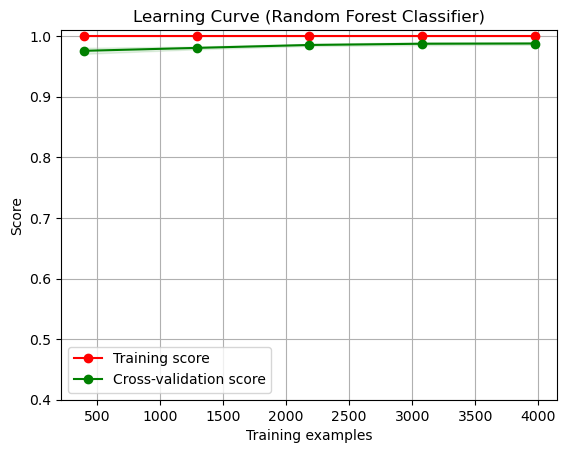

Mean cross-validation score: 0.9699951977727391


In [18]:
#to see the performance of rondom forest model which is our best model we can use learning curves 

from sklearn.model_selection import learning_curve

rfc = RandomForestClassifier()

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define the parameters for the learning curve plot
title = "Learning Curve (Random Forest Classifier)"
cv = 5
n_jobs = -1
ylim = (0.4, 1.01)

# Call the plot_learning_curve function and display the plot
plot_learning_curve(rfc, title, X_train, y_train, ylim=ylim, cv=cv, n_jobs=n_jobs)
plt.show()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
predictions = rfc.predict(X_test)

print("Mean cross-validation score:", np.mean(cv_scores))

In [115]:
#Define the hyperparameters and their ranges to search over:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': ['None', 4, 6, 8],
    'min_samples_split': [2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 'None'],
    'random_state': ['None', 42, 50],
    'min_samples_leaf' : [1, 3],


}

In [116]:
#Create a random forest classifier object:
rfc_1 = RandomForestClassifier()

In [117]:
#Create a grid search object using the defined hyperparameters and search strategy:
from sklearn.model_selection import GridSearchCV, train_test_split
grid_search = GridSearchCV(estimator=rfc_1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [118]:
#Fit the grid search object to the training data:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': ['None', 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150],
                         'random_state': ['None', 42, 50]},
             verbose=2)

In [59]:
rfc_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [119]:
#Perform cross-validation to evaluate the performance of the model:
cv_accuracy = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print(f'Cross-validation accuracy: {cv_accuracy.mean():.5f}')

Cross-validation accuracy: 0.98772


In [122]:
#Extract the best hyperparameters and evaluate the model on the test set:
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


#print('Higher than 98 is ecpected')
print(f'Best parameters: {grid_search.best_params_}')
print(f'Test set accuracy: {accuracy:.5f}')
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("white wine", "red wine"), columns=("white wine", "red wine"))
display(a)
print ("Classification Report")
print(classification_report(y_test, y_pred, target_names=["white","red"]))

Best parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Test set accuracy: 0.99034
Confusion matrix:


,white wine,red wine
white wine,885,15
red wine,20,322


Classification Report
              precision    recall  f1-score   support

       white       0.99      1.00      0.99       900
         red       0.99      0.97      0.98       342

    accuracy                           0.99      1242
   macro avg       0.99      0.98      0.99      1242
weighted avg       0.99      0.99      0.99      1242



So now we have improved the model's accuary from 98% to 99%